# Personalização das Visualizações

## Sobre os Dados
Neste notebook, estaremos trabalhando com 2 conjuntos de dados:
- Preço das ações do Facebook ao longo de 2018 (obtido usando o pacote [`stock_analysis`](https://github.com/stefmolin/stock-analysis))
- Dados de terremotos de 18 de setembro de 2018 a 13 de outubro de 2018 (obtidos do Serviço Geológico dos Estados Unidos (USGS) usando a [API do USGS](https://earthquake.usgs.gov/fdsnws/event/1/))

## Configuração

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

quakes = pd.read_csv('data/earthquakes.csv')

## Adicionando Linhas de Referência
### Linhas de Referência Horizontais
`axhline()` adiciona linhas horizontais. Simplesmente especificamos o valor de y onde queremos desenhar a linha horizontal com o parâmetro `y`. Opcionalmente, podemos fornecer:
- `label` para uma string que aparecerá na legenda
- `color` para a cor da linha de referência
- `linestyle` para o tipo de linha a desenhar

Vamos desenhar linhas de referência para suporte e resistência usando o pacote [`stock_analysis`](https://github.com/stefmolin) que construiremos no capítulo 7. Para obter essas métricas, precisamos criar um objeto `StockAnalyzer`:

In [2]:
from stock_analysis import StockAnalyzer

fb_analyzer = StockAnalyzer(fb)

Com o `fb_analyzer`, podemos usar os métodos `support()` e `resistance()` para obter os valores que buscamos:

In [3]:
support, resistance = (
    getattr(fb_analyzer, stat)(level=3) for stat in ['support', 'resistance']
)
support, resistance

/Users/goliveira/Library/Caches/pypoetry/virtualenvs/hands-on-data-analysis-with-pandas-2nd-edi-BuKKwh-Y-py3.10/lib/python3.10/site-packages/stock_analysis/stock_analyzer.py:49: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.data.last('1D').low.iat[0]
/Users/goliveira/Library/Caches/pypoetry/virtualenvs/hands-on-data-analysis-with-pandas-2nd-edi-BuKKwh-Y-py3.10/lib/python3.10/site-packages/stock_analysis/stock_analyzer.py:44: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.data.last('1D').high.iat[0]
/Users/goliveira/Library/Caches/pypoetry/virtualenvs/hands-on-data-analysis-with-pandas-2nd-edi-BuKKwh-Y-py3.10/lib/python3.10/site-packages/stock_analysis/stock_analyzer.py:39: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead

(124.4566666666667, 138.5266666666667)

Now that we have the values, we can add our reference lines with `plt.axhline()`:

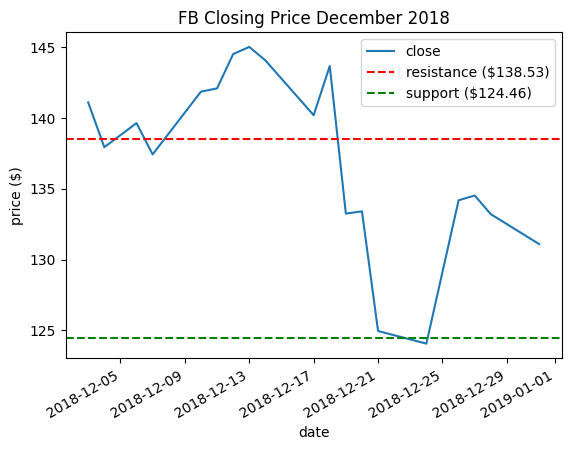

In [4]:
fb.close['2018-12'].plot(title='FB Closing Price December 2018')
plt.axhline(
    y=resistance, color='r', linestyle='--',
    label=f'resistance (${resistance:,.2f})'
)
plt.axhline(
    y=support, color='g', linestyle='--',
    label=f'support (${support:,.2f})'
)
plt.ylabel('price ($)')
plt.legend()

## Sombreamento de Regiões

Podemos usar `axhspan()` e `axvspan()` para sombrear regiões horizontais e verticais, respectivamente.

Text(0, 0.5, 'Price ($)')

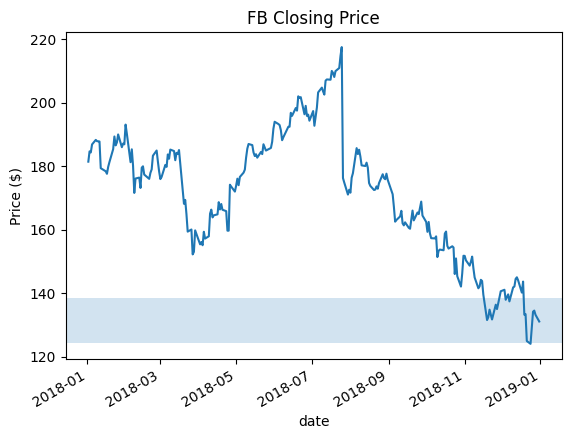

In [5]:
ax = fb.close.plot(title='FB Closing Price')
ax.axhspan(support, resistance, alpha=0.2)
plt.ylabel('Price ($)')

Em vez de preencher uma região retangular, podemos preencher entre duas curvas usando `plt.fill_between()`:

Text(0.5, 1.0, 'FB differential between high and low price Q4 2018')

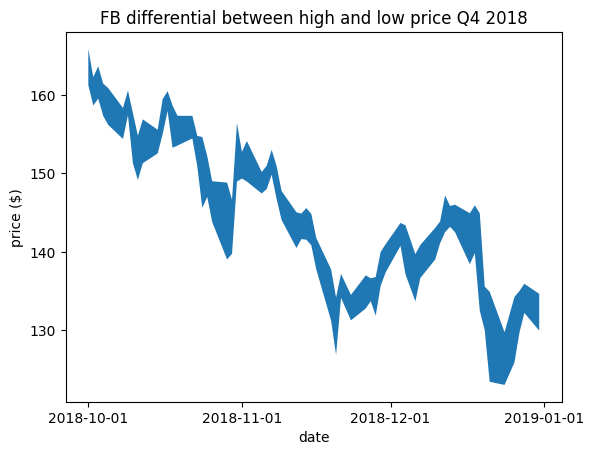

In [6]:
fb_q4 = fb.loc['2018-Q4']
plt.fill_between(fb_q4.index, fb_q4.high, fb_q4.low)
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])
plt.xlabel('date')
plt.ylabel('price ($)')
plt.title('FB differential between high and low price Q4 2018')

Podemos especificar um intervalo específico para preencher usando o argumento `where`:

Text(0.5, 1.0, 'FB differential between high and low price Q4 2018')

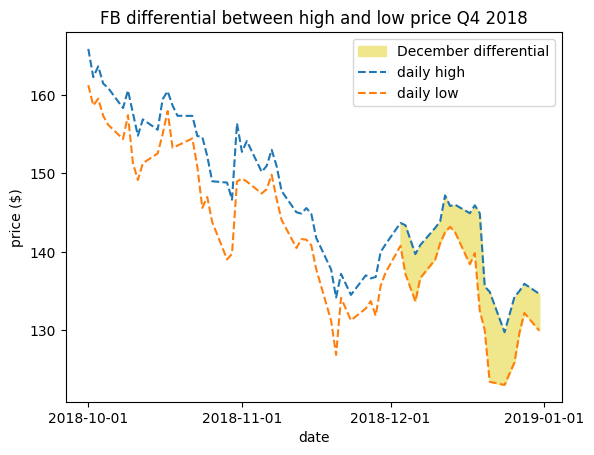

In [7]:
fb_q4 = fb.loc['2018-Q4']
plt.fill_between(
    fb_q4.index, fb_q4.high, fb_q4.low, 
    where=fb_q4.index.month == 12, 
    color='khaki', label='December differential'
)
plt.plot(fb_q4.index, fb_q4.high, '--', label='daily high')
plt.plot(fb_q4.index, fb_q4.low, '--', label='daily low')
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])
plt.xlabel('date')
plt.ylabel('price ($)')
plt.legend()
plt.title('FB differential between high and low price Q4 2018')

## Anotações

A função `plt.annotate()` pode ser usada para adicionar anotações aos gráficos. Alguns argumentos importantes são:

- `xy`: uma tupla das coordenadas para anotar
- `xytext`: uma tupla das coordenadas de onde colocar o texto da anotação
- `arrowprops`: um dicionário de como desenhar a seta do texto da anotação para o ponto sendo anotado
- `ha`/`va`: especificam o alinhamento horizontal/vertical

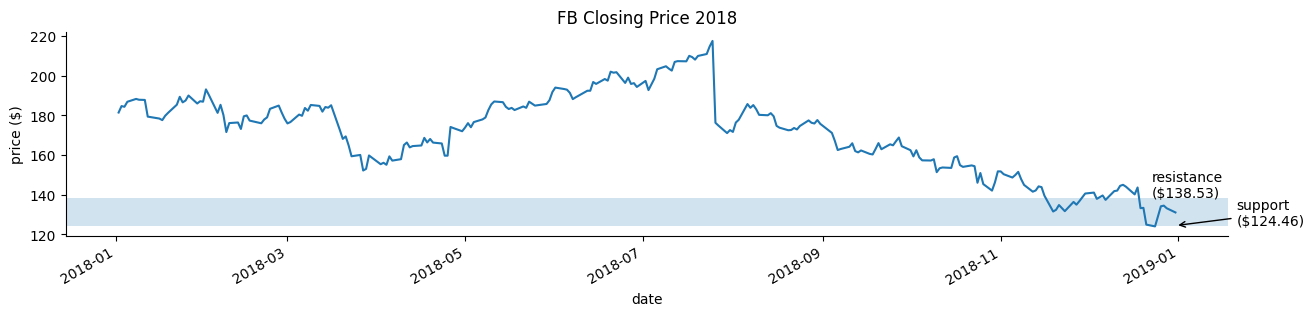

In [8]:
ax = fb.close.plot(title='FB Closing Price 2018', figsize=(15, 3))
ax.set_ylabel('price ($)')

ax.axhspan(support, resistance, alpha=0.2)

plt.annotate(
    f'support\n(${support:,.2f})',
    xy=('2018-12-31', support),
    xytext=('2019-01-21', support),
    arrowprops={'arrowstyle': '->'}
)
plt.annotate(
    f'resistance\n(${resistance:,.2f})',
    xy=('2018-12-23', resistance)
)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

Temos várias opções para a seta:

Text(0, 0.5, 'price ($)')

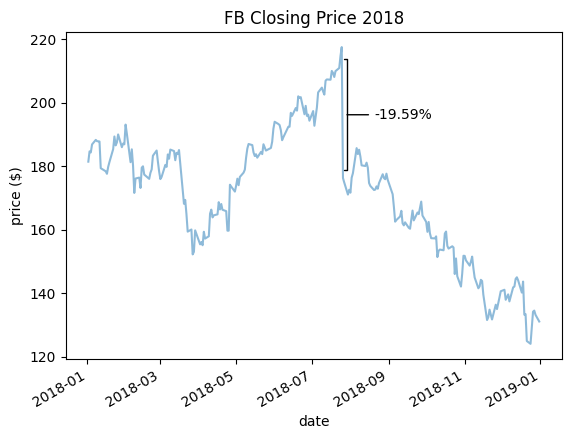

In [9]:
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
pct_drop = (open_price - close_price) / close_price
fb.close.plot(title='FB Closing Price 2018', alpha=0.5)
plt.annotate(
    f'{pct_drop:.2%}', va='center',
    xy=('2018-07-27', (open_price + close_price) / 2),
    xytext=('2018-08-20', (open_price + close_price) / 2),
    arrowprops=dict(arrowstyle='-[,widthB=4.0,lengthB=0.2')
)
plt.ylabel('price ($)')

Também podemos passar parâmetros adicionais para a classe [`matplotlib.text.Text`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text), como `color`, `fontfamily`, `fontsize` e `fontweight`:

Text(0, 0.5, 'price ($)')

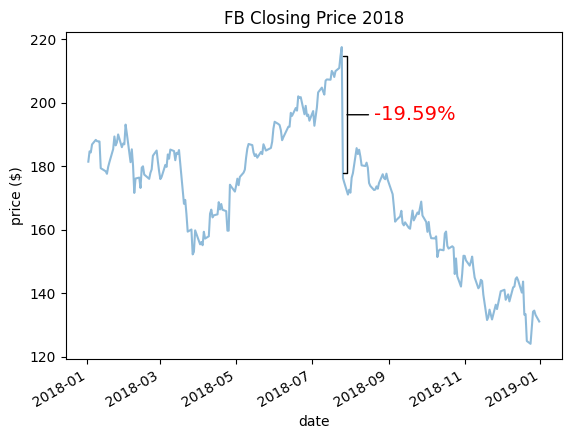

In [10]:
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
pct_drop = (open_price - close_price) / close_price

fb.close.plot(title='FB Closing Price 2018', alpha=0.5)

plt.annotate(
    f'{pct_drop:.2%}', va='center',
    xy=('2018-07-27', (open_price + close_price) / 2),
    xytext=('2018-08-20', (open_price + close_price) / 2),
    arrowprops=dict(arrowstyle='-[,widthB=3.0,lengthB=0.2'),
    color='red',
    fontsize=14,
    fontweight='medium'
)
plt.ylabel('price ($)')

## Cores

Podemos passar cores para o argumento `color` do método `plot()`. Isso pode ser um nome de cor, um código hexadecimal ou valores RGB.

Text(0, 0.5, 'price ($)')

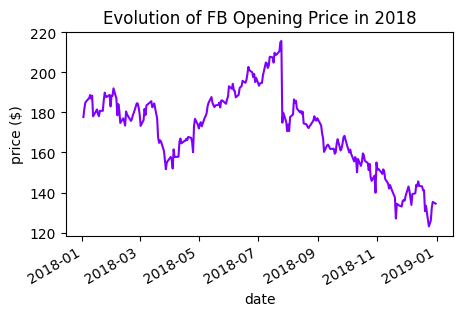

In [11]:
fb.plot(
    y='open',
    figsize=(5, 3),
    color='#8000FF',
    legend=False,
    title='Evolution of FB Opening Price in 2018'
)
plt.ylabel('price ($)')

Valores RGB devem ser fornecidos como decimais:

Text(0, 0.5, 'price ($)')

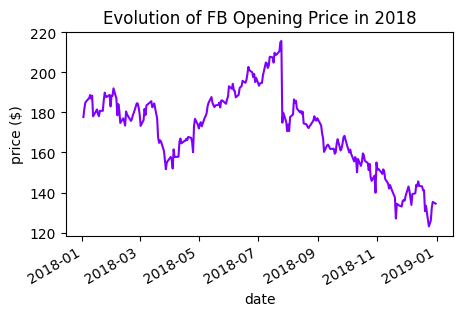

In [12]:
fb.plot(
    y='open',
    figsize=(5, 3),
    color=(128 / 255, 0, 1),
    legend=False,
    title='Evolution of FB Opening Price in 2018'
)
plt.ylabel('price ($)')

### Mapas de Cores

| Classe | Propósito |
| --- | --- |
| Qualitativo | Sem ordenação ou relação entre cores; usado apenas para distinguir entre grupos |
| Sequencial | Para informações com ordenação, como temperatura |
| Divergente | Existe um valor central entre dois extremos que tem significado; por exemplo, coeficientes de correlação estão limitados no intervalo `[-1, 1]`, e `0` tem significado (sem correlação) |

#### Encontrando mapas de cores disponíveis

In [13]:
from matplotlib import cm
cm.datad.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])

Nós podemos passar um colormap para o argumento `colormap`:

Text(0, 0.5, 'price ($)')

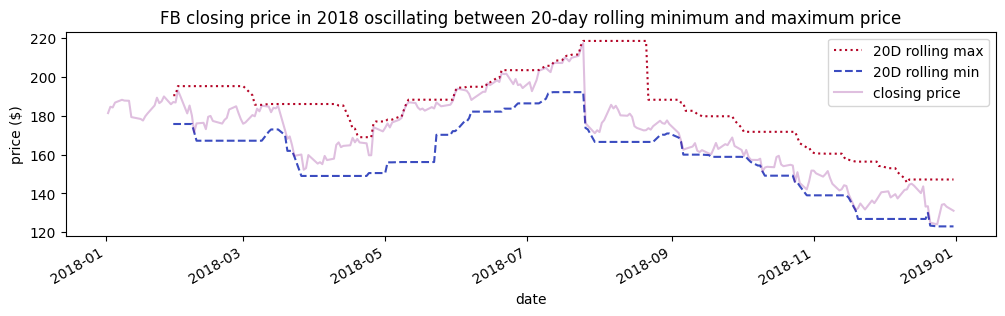

In [14]:
ax = fb.assign(
    rolling_min=lambda x: x.low.rolling(20).min(),
    rolling_max=lambda x: x.high.rolling(20).max()
).plot(
    y=['rolling_max', 'rolling_min'], 
    colormap='coolwarm_r', 
    label=['20D rolling max', '20D rolling min'],
    style=[':', '--'],
    figsize=(12, 3),
    title='FB closing price in 2018 oscillating between '
          '20-day rolling minimum and maximum price'
)
ax.plot(fb.close, 'purple', alpha=0.25, label='closing price')
plt.legend()
plt.ylabel('price ($)')

#### Paletas de Cores do Seaborn

O Seaborn também fornece paletas de cores adicionais, juntamente com funções utilitárias para escolher mapas de cores e criar personalizados interativamente no Jupyter. Veja [este tutorial](https://seaborn.pydata.org/tutorial/color_palettes.html) para mais informações.

##### Mostrando uma paleta de cores

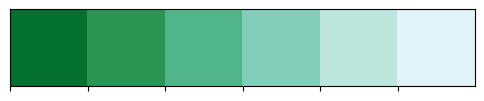

In [17]:
import seaborn as sns

sns.palplot(sns.color_palette("BuGn_r"))

##### Construindo uma paleta de cores interativamente para uso com matplotlib

In [ ]:
diverging_cmap = sns.choose_diverging_palette()

## Texturas

Podemos adicionar texturas aos nossos gráficos via o parâmetro `hatch` no `matplotlib`. As opções atuais são: {'/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}

[Text(0.5, 0, 'week number'), Text(0, 0.5, 'volume traded')]

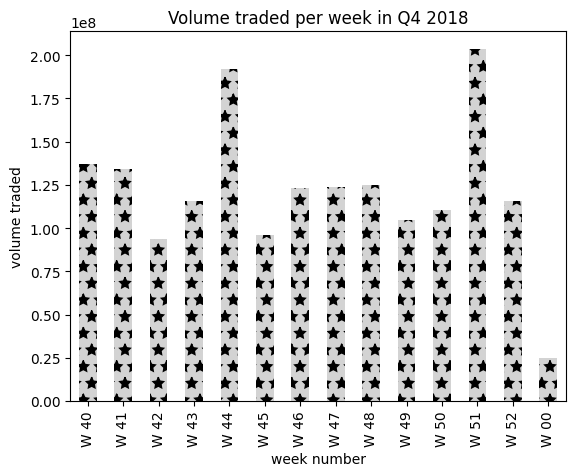

In [22]:
weekly_volume_traded = fb.loc['2018-Q4'].groupby(pd.Grouper(freq='W')).volume.sum()
weekly_volume_traded.index = weekly_volume_traded.index.strftime('W %W')
ax = weekly_volume_traded.plot(
    kind='bar', hatch='*', color='lightgray',
    title='Volume traded per week in Q4 2018'
)
ax.set(xlabel='week number', ylabel='volume traded')

Podemos combinar texturas para criar novas e repeti-las para intensificar o efeito:

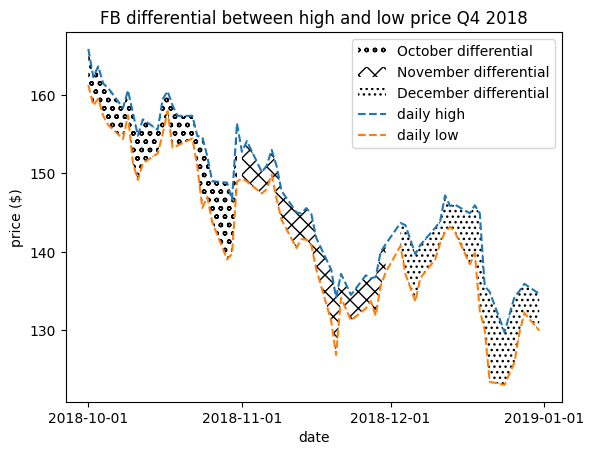

In [23]:
import calendar

fb_q4 = fb.loc['2018-Q4']

for texture, month in zip(['oo', '/\\/\\', '...'], [10, 11, 12]):
    plt.fill_between(
        fb_q4.index, fb_q4.high, fb_q4.low, hatch=texture, 
        where=fb_q4.index.month == month, facecolor='white',
        label=f'{calendar.month_name[month]} differential'
    )

plt.plot(fb_q4.index, fb_q4.high, '--', label='daily high')
plt.plot(fb_q4.index, fb_q4.low, '--', label='daily low')
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])
plt.xlabel('date')
plt.ylabel('price ($)')
plt.title('FB differential between high and low price Q4 2018')
plt.legend()

### Dicas para escolher o gráfico mais apropriado

<img src="../appendix/choosing_the_appropriate_plot_flow_chart.png" align="center" width="1200" alt="choosing the appropriate plot">

<hr>
<div>
    <a href="./2-formatting_plots.ipynb">
        <button>&#8592; Previous Notebook</button>
    </a>
    <a href="../pratica/pratica.ipynb">
        <button style="float: right;">Prática &#8594;</button>
    </a>
</div>
<hr>